In [3]:
import numpy as np
import matplotlib.pyplot as plt

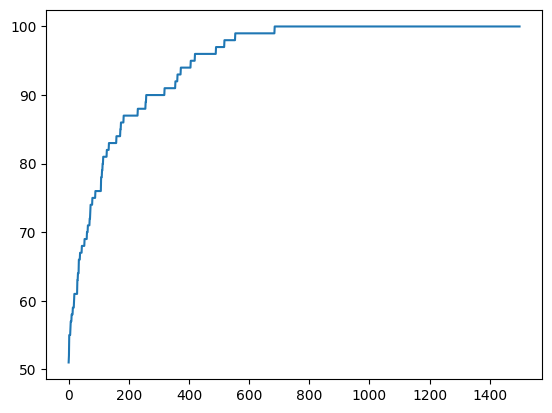

In [9]:
'''In this exercise, you will perform a small experiment to examine the role of selection pressure in a simple genetic algorithm (GA). Consider the following (1+1)-GA for binary problems:
– Step 1: Randomly generate a bit sequence x
– Step 2: Create a copy of x and invert each bit with probability μ. Let xm be the result. – Step 3: If xm is closer to the goal sequence than x, replace x with xm.
– Step 4: Repeat steps 2 and 3 until the goal sequence is reached.
The Counting Ones problem amounts to fit a bit string whose sum of entries is maximum.
1. Implement a simple (1+1)-GA for solving the Counting Ones problem. Use bit strings of length l = 100 and a mutation rate μ = 1/l. For a run of 1500 generations, plot the best fitness against the elapsed number of generations. Does the algorithm find the optimum?'''

def simple_ga():
    l = 100
    mu = 1/l
    goal = np.ones(l)
    generations = 1500
    fitness = np.zeros(generations)
    x = np.random.randint(0,2,l)
    for i in range(generations):
        xm = x.copy()
        for j in range(l):
            if np.random.rand() < mu:
                xm[j] = 1 - xm[j]
        if np.sum(xm) > np.sum(x):
            x = xm
        fitness[i] = np.sum(x)
    plt.plot(fitness)
    plt.show()

simple_ga()

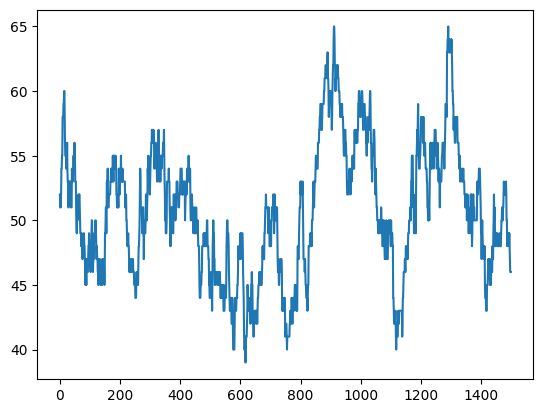

In [4]:
def simple_ga_modified():
    l = 100
    mu = 1/l
    generations = 1500
    fitness = np.zeros(generations)
    x = np.random.randint(0,2,l)
    for i in range(generations):
        xm = x.copy()
        for j in range(l):
            if np.random.rand() < mu:
                xm[j] = 1 - xm[j]
        x = xm
        fitness[i] = np.sum(x)
    plt.plot(fitness)
    plt.show()

simple_ga_modified()

In [5]:
def fitness_function(string, target):
    return np.sum(np.array(string) == np.array(target)) / len(target)

def hamming_distance(string, target):
    return np.sum(np.array(string) != np.array(target))

def string_search_ga(target, L=15, N=200, mu=0.1, pc=1, K=5, generations=100):
    alphabet = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
    population = np.random.choice(alphabet, (N,L))
    diversities = []
    for i in range(generations):
        new_population = population.copy()
        for j in range(N//2):
            parent1 = population[np.random.choice(N, K)]
            parent2 = population[np.random.choice(N, K)]

            max_parent1 = np.argmax([fitness_function(parent1[k], list(target)) for k in range(K)])
            max_parent2 = np.argmax([fitness_function(parent2[k], list(target)) for k in range(K)])
            parent1 = parent1[max_parent1]
            parent2 = parent2[max_parent2]
            child1 = parent1.copy()
            child2 = parent2.copy()
            crossover_point = np.random.randint(0, L)
            child1[:crossover_point] = parent2[:crossover_point]
            child2[:crossover_point] = parent1[:crossover_point]
            for k in range(L):
                if np.random.rand() < mu:
                    child1[k] = np.random.choice(alphabet)
                if np.random.rand() < mu:
                    child2[k] = np.random.choice(alphabet)
            if (list(target) == child1).all() or (list(target) == child2).all():
                print(f"Found target {list(target)} in generation {i}")
                return diversities

            new_population[2*j] = child1
            new_population[2*j+1] = child2
        
        hamming = []
        for k in range(len(population)-1):
            for l in range(i+1, len(population)):
                hamming.append(hamming_distance(population[k],population[l]))
        mean_dist = np.sum(hamming)/len(hamming)
        diversities.append(mean_dist)
        population = new_population
    return diversities

In [6]:
divers = string_search_ga('abcdefghjlkoinp', generations=100, mu=1/5, N=200, K=2)
# plt.plot(divers)
# plt.xlabel('Generation')
# plt.ylabel('Mean Hamming distance')


In [71]:
mean_gens = 0
for i in range(10):
    mean_gens += string_search_ga('abcdefghjlkoinp', generations=500, mu=1/15, N=200, K=2)

print(mean_gens/10)

Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 46
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 53
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 50
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 35
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 50
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 62
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 85
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 58
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'l', 'k', 'o', 'i', 'n', 'p'] in generation 56
Found target ['a', 'b', 'c', 'd', 'e', 'f', 'g

In [266]:
best_distance

198.45358890064398

In [48]:
def opt_swap(route, i, k):
    new_route = np.concatenate([route[:i], route[i:k+1][::-1], route[k+1:]])
    return new_route

In [195]:
def read_tsp(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    coordinates = []
    for line in lines:
        coordinates.append([float(x) for x in line.split()])
    return np.array(coordinates)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


def total_distance(tour, distances):
    return np.sum([distances[tour[i],tour[(i+1)%len(tour)]] for i in range(len(tour))])


def tsp(coordinates, distances, generations=1500, N=100, K=2, mu=0.1, memetic=False):
    n = len(coordinates)
    population = np.array([np.random.permutation(n) for _ in range(N)]) 
    distance_cache = np.array([total_distance(individual, distances) for individual in population])
    for _ in range(generations):
        new_population = np.empty_like(population)
        new_distance_cache = np.empty_like(distance_cache)
        for j in range(N//2):
            parent1 = np.random.choice(N, 2, replace=False)
            parent2 = np.random.choice(N, 2, replace=False)

            min_parent1 = np.argmin(distance_cache[parent1])
            min_parent2 = np.argmin(distance_cache[parent2])

            parent1 = population[parent1[min_parent1]] 
            parent2 = population[parent2[min_parent2]]
            
            crossover_point_1, crossover_point_2 = 15, 35

            child1, child2 = np.zeros(n, dtype=int), np.zeros(n, dtype=int)
            child1[crossover_point_1:crossover_point_2] = parent1[crossover_point_1:crossover_point_2]
            
            child2[crossover_point_1:crossover_point_2] = parent2[crossover_point_1:crossover_point_2]

            set_c1, set_c2 = set(child1[crossover_point_1:crossover_point_2]), set(child2[crossover_point_1:crossover_point_2])
            
            cp1, cp2 = crossover_point_2, crossover_point_2
            for k in range(n):
                if parent2[k] not in set_c1:
                    child1[cp1 % n] = parent2[k]
                    cp1 += 1
                if parent1[k] not in set_c2:
                    child2[cp2 % n] = parent1[k]
                    cp2 += 1
                    
            if np.random.rand() < mu:
                swap1, swap2 = np.random.randint(0, n, 2)
                child1[swap1], child1[swap2] = child1[swap2], child1[swap1]
            if np.random.rand() < mu:
                swap1, swap2 = np.random.randint(0, n, 2)
                child2[swap1], child2[swap2] = child2[swap2], child2[swap1]

            if memetic:
                improvement1 = 0
                improvement2 = 0
                for k in range(n-1):
                    for l in range(k+1, n):
                        length_delta_child1 = - distances[child1[k], child1[k+1]] - distances[child1[l], child1[(l+1)%n]] + distances[child1[k+1], child1[(l+1)%n]] + distances[child1[k], child1[l]]
                        length_delta_child2 = - distances[child2[k], child2[k+1]] - distances[child2[l], child2[(l+1)%n]] + distances[child2[k+1], child2[(l+1)%n]] + distances[child2[k], child2[l]]
                        if length_delta_child1 < 0 and improvement1 < 5:
                            new_child1 = opt_swap(child1, k, l)
                            child1 = new_child1
                            improvement1 += 1
                        if length_delta_child2 < 0 and improvement2 < 5:
                            new_child2 = opt_swap(child2, k, l)
                            child2 = new_child2
                            improvement2 += 1              
                        if improvement1 == 5 and improvement2 == 5:
                            break
            
            new_population[2*j] = child1
            new_population[2*j+1] = child2
            new_distance_cache[2*j], new_distance_cache[2*j+1] = total_distance(child1, distances), total_distance(child2, distances)
        population = new_population
        distance_cache = new_distance_cache
    best_tour = population[np.argmin(distance_cache)]
    return best_tour, total_distance(best_tour, distances)

In [4]:
coordinates = read_tsp('file-tsp.txt')

In [6]:
distances = np.zeros((50,50))

for i in range(50):
    for j in range(50):
        distances[i,j] = euclidean_distance(coordinates[i], coordinates[j])

In [166]:
mean_distance = 0
for i in range(10):
    best_tour, best_distance = tsp(coordinates, distances, generations=1500, N=200, K=2, mu=2/50, memetic=False)
    mean_distance += best_distance
mean_distance/10

205.47141463548124

In [171]:
mean_distance = 0
for i in range(10):
    print(i)
    best_tour, best_distance = tsp(coordinates, distances, generations=1500, N=200, K=2, mu=2/50, memetic=True)
    mean_distance += best_distance
mean_distance/10

0
1
2
3
4
5
6
7
8
9


220.92720890052038

In [167]:
def read_tsp_coords(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    coordinates = []
    for line in lines:
        coordinates.append([float(x) for x in line.split()[1:]])
    return np.array(coordinates)

In [168]:
new_dataset_coordinates = read_tsp_coords('berlin52.tsp')

In [183]:
distances_new = np.zeros((52,52))

for i in range(52):
    for j in range(52):
        distances_new[i,j] = euclidean_distance(new_dataset_coordinates[i], new_dataset_coordinates[j])

In [187]:
mean_distance = 0
for i in range(10):
    print(i)
    best_tour, best_distance = tsp(new_dataset_coordinates, distances_new, generations=1500, N=200, K=2, mu=2/52, memetic=False)
    mean_distance += best_distance
mean_distance/10

0
1
2
3
4
5
6
7
8
9


12440.055710347337

In [197]:
mean_distance = 0
for i in range(10):
    print(i)
    best_tour, best_distance = tsp(new_dataset_coordinates, distances_new, generations=1500, N=200, K=2, mu=2/52, memetic=True)
    mean_distance += best_distance
mean_distance/10

0
1
2
3
4
5
6
7
8
9


13566.97409705323